In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import os

params = {
    'axes.titlesize': '20'
}
plb.rcParams.update(params)

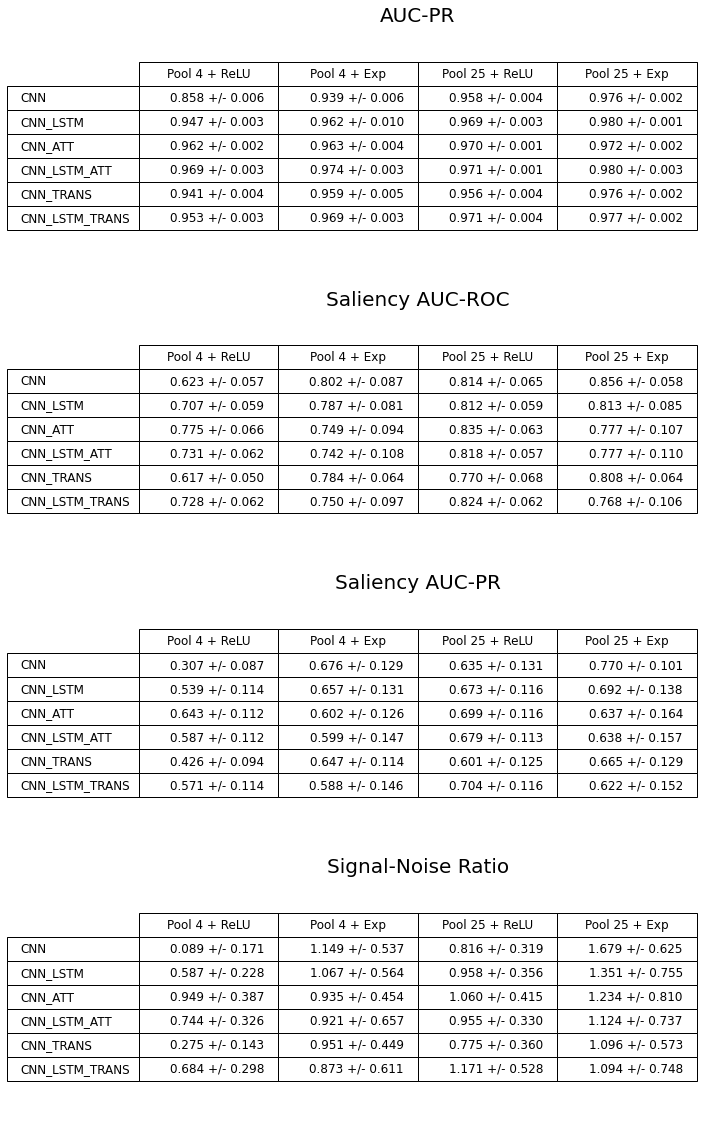

In [2]:
bases = ['Pool 4 + ReLU', 'Pool 4 + Exp', 'Pool 25 + ReLU', 'Pool 25 + Exp']

archs = ['CNN', 'CNN_LSTM', 'CNN_ATT', 'CNN_LSTM_ATT', 'CNN_TRANS', 'CNN_LSTM_TRANS']
stats = []
dirs = ['pool4_relu', 'pool4_exp', 'pool25_relu', 'pool25_exp']
for i in range(len(dirs)):
    direc1 = dirs[i] + '/stats'
    
    data1 = []
    for j in range(len(archs)):
        direc2 = direc1 + '/' + archs[j]
        files = [a for a in os.listdir(direc2)]
        
        itp_trials = []
        pfc_trials = []
        for k in range(len(files)):
            direc3 = direc2 + '/' + files[k]
            d = np.load(direc3, allow_pickle=True)
            try:
                itp_trials = np.concatenate([itp_trials, np.array([d[0], d[1], d[2]])], axis=1)
            except:
                itp_trials = np.array([d[0], d[1], d[2]])
            pfc_trials.append([d[3], d[4]])
        # trial, statistic, value -> statistic, trial, value
        itp_trials = np.array(itp_trials)
        pfc_trials = np.array(pfc_trials).transpose()
        
        trials = np.array([itp_trials[0], itp_trials[1], itp_trials[2], pfc_trials[0], pfc_trials[1]])
        
        data = []
        for k in range(len(trials)):
            mean = np.mean(trials[k])
            stdv = np.std(trials[k])
            data.append('%.3f +/- %.3f' % (mean, stdv))
        data = np.array(data)[[3, 0, 1, 2]]
        data1.append(data)
    data1 = np.array(data1)
    stats.append(data1)
stats = np.array(stats).transpose([2, 1, 0])

fig, axes = plt.subplots(len(stats), 1, figsize=(10, 20))
for i in range(len(axes)):
    axes[i].axis('off')
    axes[i].title.set_text(['AUC-PR', 'Saliency AUC-ROC', 'Saliency AUC-PR', 'Signal-Noise Ratio'][i])
    table = axes[i].table(cellText=stats[i], loc='center', rowLabels=archs, colLabels=bases)
    table.scale(1, 2)
    table.set_fontsize(12)